# Resource Assignment Problem using OR-Tools

This notebook demonstrates how to solve a resource assignment problem using Google OR-Tools. We'll solve a problem where we need to assign workers to tasks while minimizing the total cost.

## Problem Description

We have:
- 4 workers
- 4 tasks
- Different costs for each worker-task combination

Our goal is to:
1. Assign each worker to exactly one task
2. Ensure each task is assigned to exactly one worker
3. Minimize the total cost of all assignments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\zlib1.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\re2.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\highs.dll...
load d:\GitHub\google-or-tools\.venv\Lib\site-packages\ortools\.libs\ortools.dll...


## Define the Problem Data

First, let's create our cost matrix that shows the cost of assigning each worker to each task.

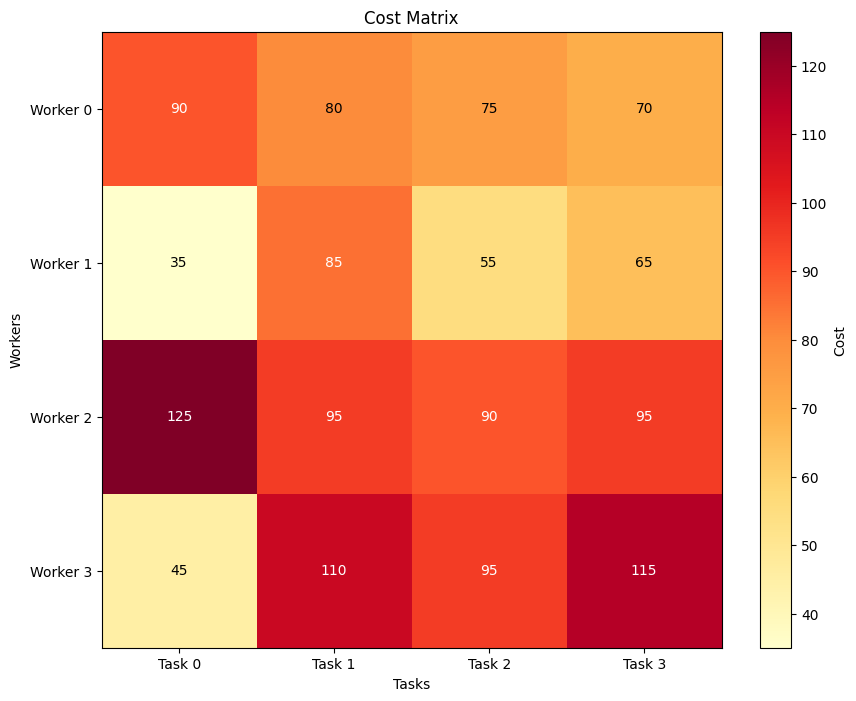

In [2]:
# Problem data
num_workers = 4
num_tasks = 4

# Cost matrix: cost[i][j] is the cost of assigning worker i to task j
costs = [
    [90, 80, 75, 70],   # Worker 0 costs
    [35, 85, 55, 65],   # Worker 1 costs
    [125, 95, 90, 95],  # Worker 2 costs
    [45, 110, 95, 115]  # Worker 3 costs
]

# Visualize the cost matrix
plt.figure(figsize=(10, 8))
plt.imshow(costs, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Cost')

# Add text annotations
for i in range(num_workers):
    for j in range(num_tasks):
        color = 'white' if costs[i][j] > np.mean(costs) else 'black'
        plt.text(j, i, f'{costs[i][j]}', ha='center', va='center', color=color)

plt.title('Cost Matrix')
plt.xlabel('Tasks')
plt.ylabel('Workers')
plt.xticks(range(num_tasks), [f'Task {i}' for i in range(num_tasks)])
plt.yticks(range(num_workers), [f'Worker {i}' for i in range(num_workers)])
plt.show()

## Create and Solve the Optimization Model

Now let's create our optimization model using OR-Tools and solve it.

In [3]:
# Create the solver
solver = pywraplp.Solver.CreateSolver('SCIP')
if not solver:
    print('Could not create solver SCIP')
else:
    print('Solver created successfully')

# Create variables
# x[i][j] is 1 if worker i is assigned to task j, 0 otherwise
x = {}
for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.BoolVar(f'x_{i}_{j}')

# Add constraints
# Each worker is assigned to exactly one task
for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) == 1)

# Each task is assigned to exactly one worker
for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

# Set objective: minimize total cost
objective = solver.Objective()
for i in range(num_workers):
    for j in range(num_tasks):
        objective.SetCoefficient(x[i, j], costs[i][j])
objective.SetMinimization()

# Solve the problem
status = solver.Solve()

Solver created successfully


## Display the Solution

Let's see what assignments the solver found and visualize them.

Solution found!
Total cost = 265.0

Assignments:
Worker 0 -> Task 3 (Cost: 70)
Worker 1 -> Task 2 (Cost: 55)
Worker 2 -> Task 1 (Cost: 95)
Worker 3 -> Task 0 (Cost: 45)


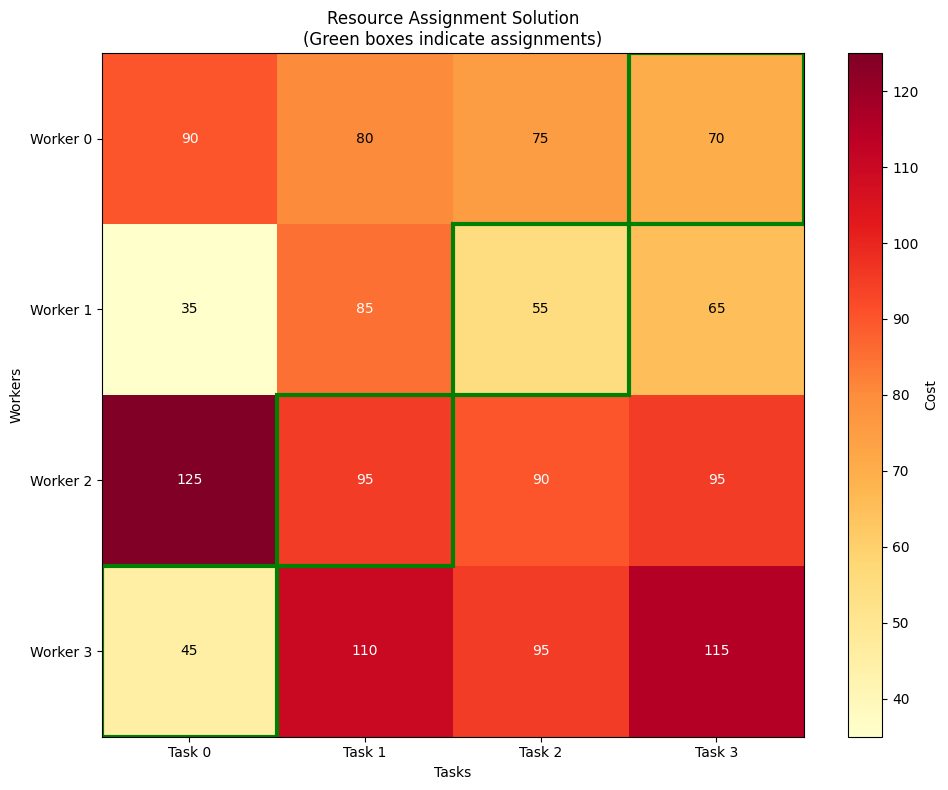

In [4]:
if status == pywraplp.Solver.OPTIMAL:
    print('Solution found!')
    print(f'Total cost = {solver.Objective().Value()}')
    print('\nAssignments:')
    for i in range(num_workers):
        for j in range(num_tasks):
            if x[i, j].solution_value() > 0.5:
                print(f'Worker {i} -> Task {j} (Cost: {costs[i][j]})')
else:
    print('No solution found.')

# Create assignment matrix for visualization
assignment = np.zeros((num_workers, num_tasks))
for i in range(num_workers):
    for j in range(num_tasks):
        if x[i, j].solution_value() > 0.5:
            assignment[i, j] = 1

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the cost matrix as a heatmap
plt.imshow(costs, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Cost')

# Add text annotations for costs
for i in range(num_workers):
    for j in range(num_tasks):
        color = 'white' if costs[i][j] > np.mean(costs) else 'black'
        plt.text(j, i, f'{costs[i][j]}', 
                ha='center', va='center', color=color)

# Highlight the assignments
for i in range(num_workers):
    for j in range(num_tasks):
        if assignment[i, j] == 1:
            plt.gca().add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, 
                                            fill=False, edgecolor='green', 
                                            lw=3))

plt.title('Resource Assignment Solution\n(Green boxes indicate assignments)')
plt.xlabel('Tasks')
plt.ylabel('Workers')
plt.xticks(range(num_tasks), [f'Task {i}' for i in range(num_tasks)])
plt.yticks(range(num_workers), [f'Worker {i}' for i in range(num_workers)])
plt.tight_layout()
plt.show()

## Interpretation of Results

The visualization shows:
1. The cost matrix as a heatmap (darker colors indicate higher costs)
2. The actual cost values in each cell
3. Green boxes highlighting the optimal assignments

The solution ensures that:
- Each worker is assigned to exactly one task
- Each task is assigned to exactly one worker
- The total cost of all assignments is minimized

This type of problem is known as the Assignment Problem or the Linear Sum Assignment Problem, and it's a special case of the Transportation Problem. The solver uses advanced optimization techniques to find the optimal solution that minimizes the total cost while satisfying all constraints.